In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model, model_selection, datasets
from matplotlib import pyplot as plt

In [2]:
# 获取加利福尼亚房价数据
house_value = datasets.fetch_california_housing()

In [3]:
house_value

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

In [5]:
X = pd.DataFrame(house_value.data, columns=house_value.feature_names)
y = house_value.target
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=66)

In [16]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.2954,37.0,6.606607,1.043544,1521.0,2.283784,34.13,-118.43
1,2.8548,6.0,8.095915,1.428064,1543.0,2.740675,34.70,-118.09
2,2.3269,35.0,4.614754,1.084699,1135.0,3.101093,32.73,-117.11
3,4.0909,16.0,5.278351,0.961340,1052.0,2.711340,36.33,-119.66
4,2.4053,21.0,4.945133,1.171681,2236.0,3.957522,36.93,-121.78


In [15]:
# 数据集恢复索引
for i in [X_train, X_test]:
    i.index = range(i.shape[0])

In [17]:
# 使用岭回归建立模型
reg = linear_model.Ridge().fit(X_train, y_train)
# 默认返回R^2
reg.score(X_test, y_test)

0.5999497696043294

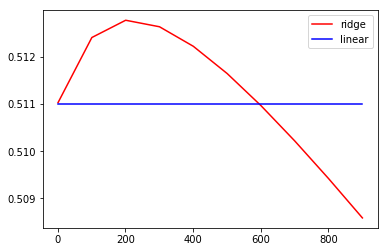

In [19]:
# 交叉验证下，岭回归与线性回归相比较
alpha_range = np.arange(1, 1001, 100)
ridge, lr = [], []
for alpha in alpha_range:
    reg = linear_model.Ridge(alpha=alpha)
    reg_score = model_selection.cross_val_score(reg, X, y, cv=10, scoring='r2').mean()
    ridge.append(reg_score)
    
    linear = linear_model.LinearRegression()
    linear_score = model_selection.cross_val_score(linear,  X, y, cv=10, scoring='r2').mean()
    lr.append(linear_score)
plt.plot(alpha_range, ridge, c='red', label='ridge')
plt.plot(alpha_range, lr, c='b', label='linear')
plt.legend()
plt.show()

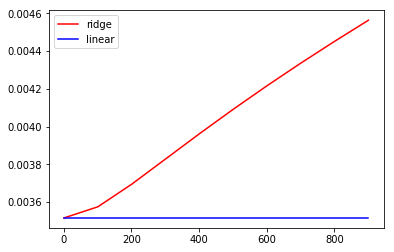

In [20]:
# 模型正则化下 方差的变化
alpha_range = np.arange(1, 1001, 100)
ridge, lr = [], []
for alpha in alpha_range:
    reg = linear_model.Ridge(alpha=alpha)
    reg_score = model_selection.cross_val_score(reg, X, y, cv=10, scoring='r2').var()
    ridge.append(reg_score)
    
    linear = linear_model.LinearRegression()
    linear_score = model_selection.cross_val_score(linear,  X, y, cv=10, scoring='r2').var()
    lr.append(linear_score)
plt.plot(alpha_range, ridge, c='red', label='ridge')
plt.plot(alpha_range, lr, c='b', label='linear')
plt.legend()
plt.show()

In [26]:
# 再在波斯顿房价上查看
boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [27]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=66)

In [28]:
for i in [X_train, X_test]:
    i.index = range(i.shape[0])

In [29]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.53412,20.0,3.97,0.0,0.647,7.520,89.4,2.1398,5.0,264.0,13.0,388.37,7.26
1,8.49213,0.0,18.10,0.0,0.584,6.348,86.1,2.0527,24.0,666.0,20.2,83.45,17.64
2,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
3,0.03049,55.0,3.78,0.0,0.484,6.874,28.1,6.4654,5.0,370.0,17.6,387.97,4.61
4,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72


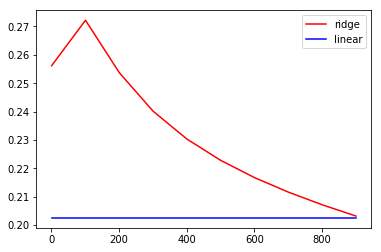

In [32]:
alpha_range = np.arange(1, 1001, 100)
ridge, lr = [], []
for alpha in alpha_range:
    reg = linear_model.Ridge(alpha=alpha)
    reg_score = model_selection.cross_val_score(reg, X, y, cv=10, scoring='r2').mean()
    ridge.append(reg_score)
    
    linear = linear_model.LinearRegression()
    linear_score = model_selection.cross_val_score(linear,X, y, cv=10, scoring='r2').mean()
    lr.append(linear_score)
plt.plot(alpha_range, ridge, c='r', label='ridge')
plt.plot(alpha_range, lr, c='b', label='linear')
plt.legend()
plt.show()
    

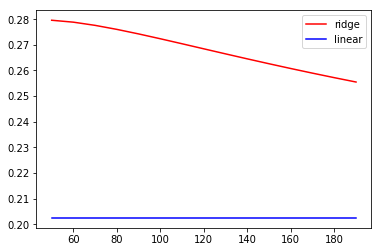

In [34]:
# 细化alpha
alpha_range = np.arange(50, 200, 10)
ridge, lr = [], []
for alpha in alpha_range:
    reg = linear_model.Ridge(alpha=alpha)
    reg_score = model_selection.cross_val_score(reg, X, y, cv=10, scoring='r2').mean()
    ridge.append(reg_score)
    
    linear = linear_model.LinearRegression()
    linear_score = model_selection.cross_val_score(linear,X, y, cv=10, scoring='r2').mean()
    lr.append(linear_score)
plt.plot(alpha_range, ridge, c='r', label='ridge')
plt.plot(alpha_range, lr, c='b', label='linear')
plt.legend()
plt.show()

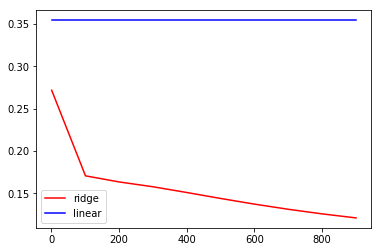

In [35]:
# 模型正则化下 方差的变化
alpha_range = np.arange(1, 1001, 100)
ridge, lr = [], []
for alpha in alpha_range:
    reg = linear_model.Ridge(alpha=alpha)
    reg_score = model_selection.cross_val_score(reg, X, y, cv=10, scoring='r2').var()
    ridge.append(reg_score)
    
    linear = linear_model.LinearRegression()
    linear_score = model_selection.cross_val_score(linear,  X, y, cv=10, scoring='r2').var()
    lr.append(linear_score)
plt.plot(alpha_range, ridge, c='red', label='ridge')
plt.plot(alpha_range, lr, c='b', label='linear')
plt.legend()
plt.show()

In [37]:
# 使用交叉验证选择合适的正则化参数
house = datasets.fetch_california_housing()
X = pd.DataFrame(house.data, columns=house.feature_names)
y = house.target

In [42]:
ridge_cv = linear_model.RidgeCV(
    alphas=np.arange(1, 1001, 100),
    store_cv_values=True
).fit(X, y)


In [39]:
ridge_cv.coef_

array([ 4.28137808e-01,  9.59363761e-03, -9.08724222e-02,  5.57500145e-01,
       -3.38722327e-06, -3.77250879e-03, -4.19032209e-01, -4.30952059e-01])

In [40]:
ridge_cv.alpha_

101

In [43]:
ridge_cv.cv_values_

array([[0.1557472 , 0.16301246, 0.16892723, ..., 0.18881663, 0.19182353,
        0.19466385],
       [0.15334566, 0.13922075, 0.12849014, ..., 0.09744906, 0.09344092,
        0.08981868],
       [0.02429857, 0.03043271, 0.03543001, ..., 0.04971514, 0.05126165,
        0.05253834],
       ...,
       [0.56545783, 0.5454654 , 0.52655917, ..., 0.44532597, 0.43130136,
        0.41790336],
       [0.27883123, 0.2692305 , 0.25944481, ..., 0.21328675, 0.20497018,
        0.19698274],
       [0.14313527, 0.13967826, 0.13511341, ..., 0.1078647 , 0.10251737,
        0.0973334 ]])

In [46]:
# 下面是sklearn中的数据集的划分的学习 参考网址：https://www.cnblogs.com/nolonely/p/7007432.html
# 第一种类型：KFold，GroupKFold，StratifiedKFold，
xx = np.array(range(1, 13)).reshape(6, 2)
xx

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12]])

In [47]:
y = np.array(range(1, 7))

In [52]:
# KFold
kfold = model_selection.KFold(n_splits=3, random_state=66)
kfold.get_n_splits(xx)

3

In [53]:
[*kfold.split(xx)]

[(array([2, 3, 4, 5]), array([0, 1])),
 (array([0, 1, 4, 5]), array([2, 3])),
 (array([0, 1, 2, 3]), array([4, 5]))]

In [65]:
# GroupKFold
xx = np.array(range(1, 13)).reshape(6, 2)
y = np.array(range(1, 7))
groups = np.array([1, 2, 3, 4, 5, 6])
group_kfold =  model_selection.GroupKFold(n_splits=3)
group_kfold.split(xx)

<generator object _BaseKFold.split at 0x11f4594f8>

In [66]:
[*group_kfold.split(xx, y, groups)]

[(array([0, 1, 3, 4]), array([2, 5])),
 (array([0, 2, 3, 5]), array([1, 4])),
 (array([1, 2, 4, 5]), array([0, 3]))]

In [67]:
# StratifiedKFold：保证训练集中每一类的比例是相同的
xx = np.array(range(1, 13)).reshape(6, 2)
y = np.array([1, 1, 1, 2, 2, 2])
skf = model_selection.StratifiedKFold(n_splits=3)
skf.get_n_splits(xx, y)
skf

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [70]:
[*skf.split(xx, y)]

[(array([1, 2, 4, 5]), array([0, 3])),
 (array([0, 2, 3, 5]), array([1, 4])),
 (array([0, 1, 3, 4]), array([2, 5]))]

In [71]:
# 第二种：LeaveOneGroupOut，LeavePGroupsOut，LeaveOneOut，LeavePOut，
# 留一法验证 假设有N个样本，将每一个样本作为测试样本，其他N-1个样本作为训练样本，这样得到N个分类器，
#N个测试结果，用这N个结果的平均值来衡量模型的性能
xx = np.array(range(1, 13)).reshape(6, 2)
y = np.array(range(1, 7))
loo = model_selection.LeaveOneOut()
[*loo.split(xx)]

[(array([1, 2, 3, 4, 5]), array([0])),
 (array([0, 2, 3, 4, 5]), array([1])),
 (array([0, 1, 3, 4, 5]), array([2])),
 (array([0, 1, 2, 4, 5]), array([3])),
 (array([0, 1, 2, 3, 5]), array([4])),
 (array([0, 1, 2, 3, 4]), array([5]))]

In [72]:
# 留P法验证
xx = np.array(range(1, 13)).reshape(6, 2)
y = np.array(range(1, 7))
lpo = model_selection.LeavePOut(p=2)
[*lpo.split(xx)]

[(array([2, 3, 4, 5]), array([0, 1])),
 (array([1, 3, 4, 5]), array([0, 2])),
 (array([1, 2, 4, 5]), array([0, 3])),
 (array([1, 2, 3, 5]), array([0, 4])),
 (array([1, 2, 3, 4]), array([0, 5])),
 (array([0, 3, 4, 5]), array([1, 2])),
 (array([0, 2, 4, 5]), array([1, 3])),
 (array([0, 2, 3, 5]), array([1, 4])),
 (array([0, 2, 3, 4]), array([1, 5])),
 (array([0, 1, 4, 5]), array([2, 3])),
 (array([0, 1, 3, 5]), array([2, 4])),
 (array([0, 1, 3, 4]), array([2, 5])),
 (array([0, 1, 2, 5]), array([3, 4])),
 (array([0, 1, 2, 4]), array([3, 5])),
 (array([0, 1, 2, 3]), array([4, 5]))]

In [73]:
lpo = model_selection.LeavePOut(p=3)
[*lpo.split(xx)]

[(array([3, 4, 5]), array([0, 1, 2])),
 (array([2, 4, 5]), array([0, 1, 3])),
 (array([2, 3, 5]), array([0, 1, 4])),
 (array([2, 3, 4]), array([0, 1, 5])),
 (array([1, 4, 5]), array([0, 2, 3])),
 (array([1, 3, 5]), array([0, 2, 4])),
 (array([1, 3, 4]), array([0, 2, 5])),
 (array([1, 2, 5]), array([0, 3, 4])),
 (array([1, 2, 4]), array([0, 3, 5])),
 (array([1, 2, 3]), array([0, 4, 5])),
 (array([0, 4, 5]), array([1, 2, 3])),
 (array([0, 3, 5]), array([1, 2, 4])),
 (array([0, 3, 4]), array([1, 2, 5])),
 (array([0, 2, 5]), array([1, 3, 4])),
 (array([0, 2, 4]), array([1, 3, 5])),
 (array([0, 2, 3]), array([1, 4, 5])),
 (array([0, 1, 5]), array([2, 3, 4])),
 (array([0, 1, 4]), array([2, 3, 5])),
 (array([0, 1, 3]), array([2, 4, 5])),
 (array([0, 1, 2]), array([3, 4, 5]))]

In [84]:
# LeaveOneGroupOut 依次次选取一个group当作测试集
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 2, 1, 2])
groups = np.array([1, 1, 2, 2])
logo = model_selection.LeaveOneGroupOut()
# logo.get_n_splits(X, y, groups)
# [*logo.split(X=xx, y=y, groups=groups)]
for train_index, test_index in logo.split(X, y, groups):
    print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     print(X_train, X_test, y_train, y_test)

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


In [91]:
# LeavePGroupsOut
# X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
xx = np.array(range(1, 13)).reshape(6, 2)
y = np.array([1, 2, 1, 2, 1, 2])
groups = np.array([1, 2, 1, 2, 3, 3,])
lpg = model_selection.LeavePGroupsOut(n_groups=2)
# [*lpg.split(xx, groups=groups)]
# lpg.split(xx, groups=groups)
for train_index, test_index in logo.split(xx, y, groups):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [1 3 4 5] TEST: [0 2]
TRAIN: [0 2 4 5] TEST: [1 3]
TRAIN: [0 1 2 3] TEST: [4 5]


In [92]:
# 因为groups只有将两个样本分为一组 所以n_groups取3时无效
lpg = model_selection.LeavePGroupsOut(n_groups=3)
for train_index, test_index in logo.split(xx, y, groups):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [1 3 4 5] TEST: [0 2]
TRAIN: [0 2 4 5] TEST: [1 3]
TRAIN: [0 1 2 3] TEST: [4 5]


In [93]:
# 第二种：随机划分法：ShuffleSplit，GroupShuffleSplit，StratifiedShuffleSplit
# ShuffleSplit 随机将数据分成几份，每份取test_size百分比作为测试集
xx = np.array(range(1, 13)).reshape(6, 2)
y = np.array(range(1, 7))
ss = model_selection.ShuffleSplit(n_splits=2, test_size=0.25, random_state=66)
[*ss.split(xx)]

[(array([2, 3, 5, 4]), array([0, 1])), (array([1, 5, 3, 2]), array([4, 0]))]

In [98]:
# GroupShuffleSplit 组随机抽样
xx = np.array(range(1, 13)).reshape(6, 2)
y = np.array(range(1, 7))
groups = np.array([1, 1, 2, 2, 3, 3])
gss = model_selection.GroupShuffleSplit(n_splits=2, test_size=0.25, random_state=66)
for train_index, test_index in gss.split(xx, y, groups):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [0 1 4 5] TEST: [2 3]
TRAIN: [2 3 4 5] TEST: [0 1]


In [99]:
groups = np.array([1, 1, 1, 3, 3, 3])
gss = model_selection.GroupShuffleSplit(n_splits=2, test_size=0.25, random_state=66)
for train_index, test_index in gss.split(xx, y, groups):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [0 1 2] TEST: [3 4 5]
TRAIN: [0 1 2] TEST: [3 4 5]


In [104]:
# StratifiedShuffleSplit 分层随机抽样
xx = np.array(range(1, 13)).reshape(6, 2)
y = np.array([1, 1, 2, 2, 3, 3])
sss = model_selection.StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=66)
for train_index, test_index in sss.split(xx, y):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [1 3 4] TEST: [0 2 5]
TRAIN: [4 3 0] TEST: [1 5 2]
TRAIN: [0 2 4] TEST: [3 1 5]
TRAIN: [3 1 5] TEST: [4 2 0]
TRAIN: [1 3 5] TEST: [2 4 0]
